In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# loading the data from csv file to a Pandas DataFrame
potato_leaf = pd.read_csv('Disease with Weather.csv')

In [3]:
# first 5 rows of the dataframe
potato_leaf.head()

,Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Disease,Disease in number
0,18.7,77,6.9,63,11.0,1015.5,Early Blight,1
1,23.4,64,4.6,137,8.9,1017.0,Late Blight,0
2,20.1,72,3.2,188,10.0,1014.8,Early Blight,1
3,25.6,61,7.1,282,9.6,1015.2,Late Blight,0
4,19.5,78,5.5,104,12.5,1016.1,Early Blight,1


In [4]:
# number of rows and columns
potato_leaf.shape

(4020, 8)

In [5]:
# getting some informations about the dataset
potato_leaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        4020 non-null   float64
 1   Humidity           4020 non-null   int64  
 2   Wind Speed         4020 non-null   float64
 3   Wind Bearing       4020 non-null   int64  
 4   Visibility         4020 non-null   float64
 5   Pressure           4020 non-null   float64
 6   Disease            4020 non-null   object 
 7   Disease in number  4020 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 251.4+ KB


In [6]:
# checking for missing values
potato_leaf.isnull().sum()

Temperature          0
Humidity             0
Wind Speed           0
Wind Bearing         0
Visibility           0
Pressure             0
Disease              0
Disease in number    0
dtype: int64

In [7]:
# statistical Measures of the dataset
potato_leaf.describe()

,Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Disease in number
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,23.580249,67.247264,5.404602,184.280846,10.111443,1015.167040,0.513930
std,2.905305,6.814943,2.114070,89.812636,1.257829,0.595284,0.499868
min,17.500000,48.000000,1.200000,0.000000,6.900000,1012.600000,0.000000
25%,21.000000,61.000000,3.700000,118.000000,9.000000,1014.800000,0.000000
50%,23.400000,68.000000,5.100000,178.000000,9.900000,1015.200000,1.000000
75%,26.100000,73.000000,7.100000,258.000000,11.300000,1015.600000,1.000000
max,30.400000,83.000000,11.100000,358.000000,14.500000,1017.200000,1.000000


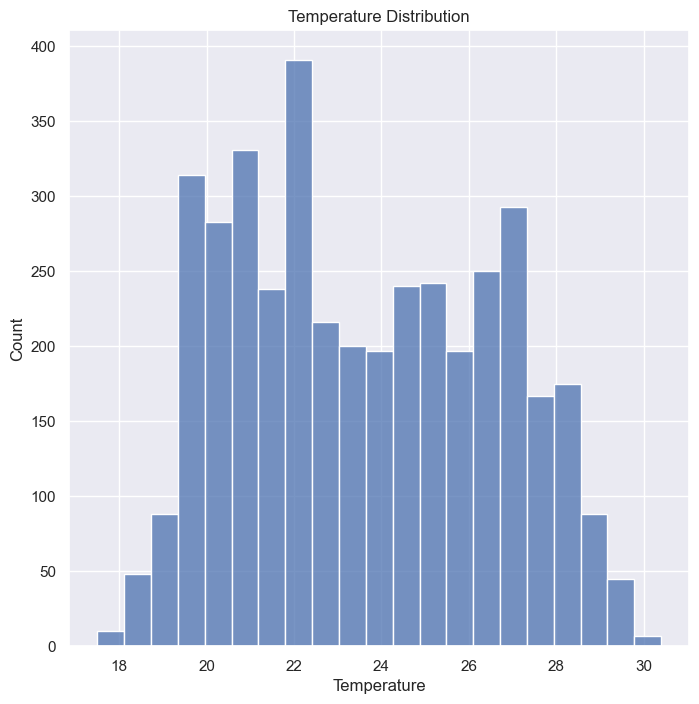

In [8]:
# distribution of temperature value
sns.set()
plt.figure(figsize=(8,8))
sns.histplot(potato_leaf['Temperature'])
plt.title('Temperature Distribution')
plt.show()

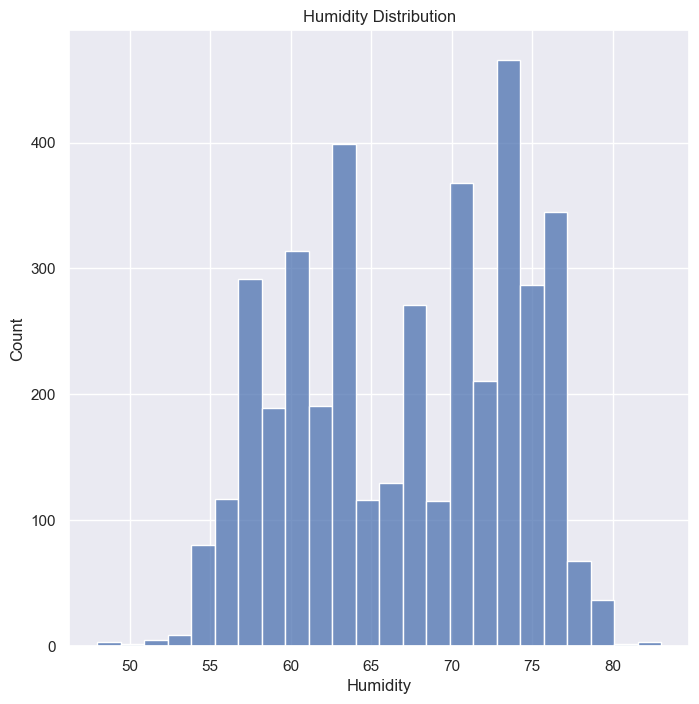

In [9]:
# distribution of humidity value
sns.set()
plt.figure(figsize=(8,8))
sns.histplot(potato_leaf['Humidity'])
plt.title('Humidity Distribution')
plt.show()

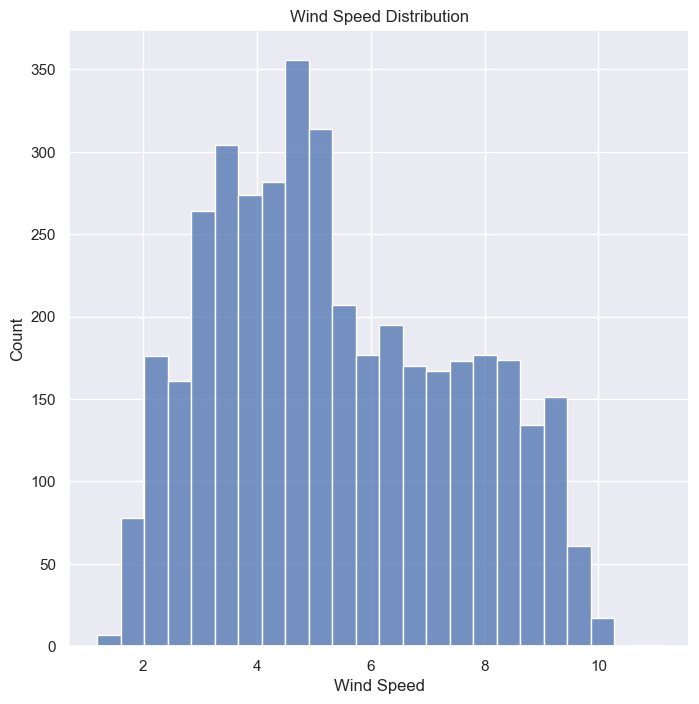

In [10]:
# distribution of temperature value
sns.set()
plt.figure(figsize=(8,8))
sns.histplot(potato_leaf['Wind Speed'])
plt.title('Wind Speed Distribution')
plt.show()


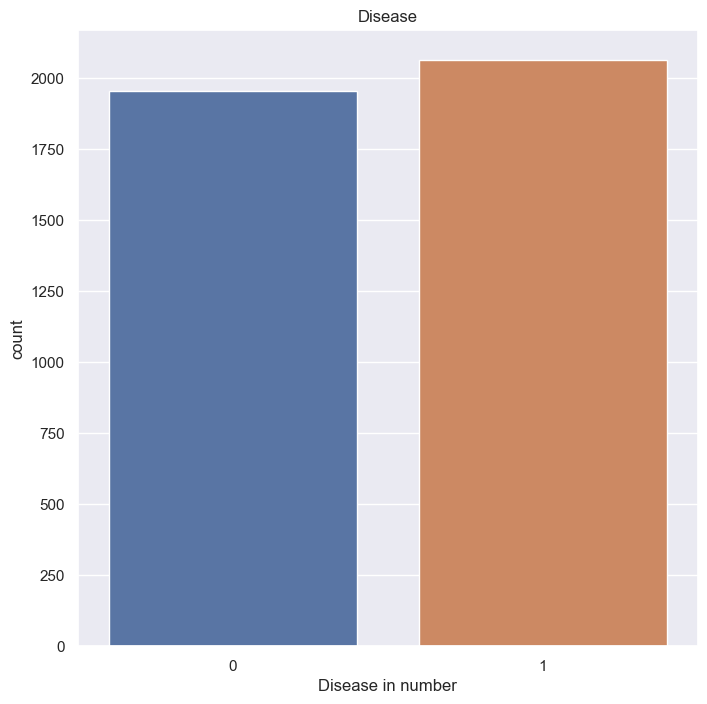

In [11]:
# smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='Disease in number', data=potato_leaf)
plt.title('Disease')
plt.show()

In [12]:
potato_leaf.replace({'Disease':{'male':0,'female':1}}, inplace=True)

In [13]:
X = potato_leaf.drop(columns=['Disease in number', 'Disease'], axis=1)
Y = potato_leaf['Disease in number']


In [14]:
print(X)

      Temperature  Humidity  Wind Speed  Wind Bearing  Visibility  Pressure
0            18.7        77         6.9            63        11.0    1015.5
1            23.4        64         4.6           137         8.9    1017.0
2            20.1        72         3.2           188        10.0    1014.8
3            25.6        61         7.1           282         9.6    1015.2
4            19.5        78         5.5           104        12.5    1016.1
...           ...       ...         ...           ...         ...       ...
4015         21.3        75         3.9           131        11.9    1015.6
4016         25.1        67         7.4           257         8.4    1016.0
4017         19.7        79         4.0            93        11.1    1014.5
4018         28.3        58         9.6           354         8.8    1015.4
4019         26.2        62         8.0           248         9.0    1015.5

[4020 rows x 6 columns]


In [15]:
print(Y)

0       1
1       0
2       1
3       0
4       1
       ..
4015    1
4016    0
4017    1
4018    0
4019    1
Name: Disease in number, Length: 4020, dtype: int64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(4020, 6) (3216, 6) (804, 6)


In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
# loading the Linear Regression model
regressor = LinearRegression()

In [20]:
X_train = X_train.select_dtypes(include=['float', 'int'])

regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [22]:
from sklearn import metrics

In [23]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7791878180995429


In [24]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)
test_data_prediction

array([ 2.91224189e-01, -3.36295735e-02, -9.99390574e-02,  9.89066145e-04,
        1.02875544e+00,  1.04242796e+00,  1.53141217e-01, -2.47657068e-01,
        1.18758030e-01, -5.77238693e-02,  5.63753912e-01,  6.92372594e-01,
        2.94767193e-02,  1.18758030e-01,  7.03861069e-01,  8.91064023e-01,
        5.80421750e-01,  1.16197389e+00,  7.79890502e-01,  2.24788296e-01,
        3.03965966e-01,  9.86312215e-01,  1.95752958e-01,  6.51404783e-01,
        7.57328586e-01, -1.40612437e-01,  3.13971955e-01,  1.18886828e+00,
       -1.08682946e-02,  8.49652315e-01,  2.90494827e-01,  8.84479561e-01,
        9.09976735e-01,  7.13638216e-01,  1.97337515e-02, -5.06223111e-02,
        9.63056480e-01,  8.01029641e-01,  5.14431327e-01,  6.18416026e-02,
        7.49739298e-01,  6.77054941e-01,  1.46112442e-01,  9.89262965e-01,
        7.69808575e-03,  1.04103087e+00,  9.66888654e-01, -6.36322219e-02,
        1.04918315e+00,  2.80991574e-01,  1.34580207e-01,  5.35265090e-01,
        1.19392518e+00,  

In [25]:
# Encode the target variable
le = LabelEncoder()
potato_leaf['Disease'] = le.fit_transform(potato_leaf['Disease in number'])

# Split the data into features (X) and the target variable (y)
X = potato_leaf[['Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing', 'Visibility', 'Pressure']]
y = potato_leaf['Disease']

# Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC()

In [27]:
# Make predictions using the models
logistic_pred = logistic_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, random_forest_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))


Logistic Regression Accuracy: 0.9713930348258707
Random Forest Accuracy: 0.9713930348258707
SVM Accuracy: 0.8569651741293532

Logistic Regression Confusion Matrix:
 [[377   8]
 [ 15 404]]
Random Forest Confusion Matrix:
 [[376   9]
 [ 14 405]]
SVM Confusion Matrix:
 [[278 107]
 [  8 411]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       385
           1       0.98      0.96      0.97       419

    accuracy                           0.97       804
   macro avg       0.97      0.97      0.97       804
weighted avg       0.97      0.97      0.97       804

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       385
           1       0.98      0.97      0.97       419

    accuracy                           0.97       804
   macro avg       0.97      0.97      0.97       804
weighted avg       0.97     

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [29]:
# Create an ANN model
model_ann = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)

# Train the ANN model on the numerical dataset
model_ann.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [30]:
# Make predictions using the ANN model
y_pred_ann = model_ann.predict(X_test)

# Evaluate the ANN model
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))



ANN Accuracy: 0.9328358208955224
ANN Confusion Matrix:
 [[341  44]
 [ 10 409]]
ANN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       385
           1       0.90      0.98      0.94       419

    accuracy                           0.93       804
   macro avg       0.94      0.93      0.93       804
weighted avg       0.94      0.93      0.93       804



In [31]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [32]:
predictions

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [33]:

import pickle
with open('potato.pkl','wb') as f:
    pickle.dump(rf,f)

In [34]:
rf.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['24','77','6','63','11','1015']).reshape(1,6)))


array([1], dtype=int64)